In [ ]:
# pip install git+https://github.com/patel-zeel/garuda

In [ ]:
# /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/seasons1_lucknow_airshed/

In [10]:
import numpy as np
import os
from garuda.ops import obb_to_aa
region = "seasons4_lucknow_airshed"
obb_label_dir = f"/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/{region}/labels"
aa_label_dir = f"/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/{region}/aa_labels"

# # Create the output directory if it doesn't exist
os.makedirs(aa_label_dir, exist_ok=True)




In [11]:
import os
import glob

IMG_WIDTH = 128
IMG_HEIGHT = 128

def convert_obb_to_aabb(coords):
    xs = coords[::2]
    ys = coords[1::2]
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    x_center = (x_min + x_max) / 2.0
    y_center = (y_min + y_max) / 2.0
    width = x_max - x_min
    height = y_max - y_min
    if width < 0 or height < 0:
        raise ValueError("Width and height must be positive values.")
    return [x_center, y_center, width, height]

def convert_folder(obb_label_path, aa_label_path):
    os.makedirs(aa_label_path, exist_ok=True)
    label_files = glob.glob(os.path.join(obb_label_path, '*.txt'))

    for file_path in label_files:
        with open(file_path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            parts = list(map(float, line.strip().split()))
            class_id = int(parts[0])
            coords = parts[1:]
            if len(coords) != 8:
                print(f"Skipping malformed line in {file_path}: {line}")
                continue
            aabb = convert_obb_to_aabb(coords)
            new_lines.append(f"{class_id} {' '.join(f'{x:.6f}' for x in aabb)}\n")

        out_path = os.path.join(aa_label_path, os.path.basename(file_path))
        with open(out_path, 'w') as f:
            f.writelines(new_lines)

        print(f"Converted {file_path} → {out_path}")


In [12]:
convert_folder(obb_label_dir,aa_label_dir)

Converted /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/seasons4_lucknow_airshed/labels/27.0443_81.0233.txt → /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/seasons4_lucknow_airshed/aa_labels/27.0443_81.0233.txt
Converted /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/seasons4_lucknow_airshed/labels/26.7442_81.0409.txt → /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/seasons4_lucknow_airshed/aa_labels/26.7442_81.0409.txt
Converted /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/seasons4_lucknow_airshed/labels/27.1557_80.9646.txt → /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/seasons4_lucknow_airshed/aa_labels/27.1557_80.9646.txt
Converted /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/seasons4_lucknow_airshed

In [ ]:
import os
import glob

IMG_WIDTH = 128
IMG_HEIGHT = 128

def convert_obb_to_aabb(coords):
    xs = coords[::2]
    print("xs", xs)
    ys = coords[1::2]
    print("ys", ys)
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    print("x_min, x_max", x_min, x_max)
    print("y_min, y_max", y_min, y_max)

    x_center = (x_min + x_max) / 2.0
    y_center = (y_min + y_max) / 2.0
    print("x_center, y_center", x_center, y_center)
    width = x_max - x_min
    height = y_max - y_min
    print("width, height", width, height)
    # Ensure width and height are positive
    if width < 0 or height < 0:
        raise ValueError("Width and height must be positive values.")

    # Normalize
    return [x_center, y_center, width, height]



 def convert_folder(obb_dir, aa_dir):
    for fold in ['0', '1', '2', '3']:
        for split in ['train', 'test']:
            obb_label_path = os.path.join(obb_dir, fold, split, 'labels')
            aa_label_path = os.path.join(aa_dir, fold, split, 'labels')
            os.makedirs(aa_label_path, exist_ok=True)

            label_files = glob.glob(os.path.join(obb_label_path, '*.txt'))

            for file_path in label_files:
                with open(file_path, 'r') as f:
                    lines = f.readlines()

                new_lines = []
                for line in lines:
                    parts = list(map(float, line.strip().split()))
                    class_id = int(parts[0])
                    coords = parts[1:]
                    if len(coords) != 8:
                        print(f"Skipping malformed line in {file_path}: {line}")
                        continue
                    aabb = convert_obb_to_aabb(coords)
                    new_lines.append(f"{class_id} {' '.join(f'{x:.6f}' for x in aabb)}\n")

                out_path = os.path.join(aa_label_path, os.path.basename(file_path))
                with open(out_path, 'w') as f:
                    f.writelines(new_lines)

                print(f"Converted {file_path} → {out_path}")   

In [ ]:
import os
import glob

IMG_WIDTH = 128
IMG_HEIGHT = 128

def convert_obb_to_aabb(coords):
    xs = coords[::2]
    print("xs", xs)
    ys = coords[1::2]
    print("ys", ys)
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    print("x_min, x_max", x_min, x_max)
    print("y_min, y_max", y_min, y_max)

    x_center = (x_min + x_max) / 2.0
    y_center = (y_min + y_max) / 2.0
    print("x_center, y_center", x_center, y_center)
    width = x_max - x_min
    height = y_max - y_min
    print("width, height", width, height)
    # Ensure width and height are positive
    if width < 0 or height < 0:
        raise ValueError("Width and height must be positive values.")

    # Normalize
    return [x_center, y_center, width, height]

def convert_folder(obb_dir, aa_dir):
    for fold in ['0', '1', '2', '3']:
        for split in ['train', 'test']:
            obb_label_path = os.path.join(obb_dir, fold, split, 'labels')
            aa_label_path = os.path.join(aa_dir, fold, split, 'labels')
            os.makedirs(aa_label_path, exist_ok=True)

            label_files = glob.glob(os.path.join(obb_label_path, '*.txt'))

            for file_path in label_files:
                with open(file_path, 'r') as f:
                    lines = f.readlines()

                new_lines = []
                for line in lines:
                    parts = list(map(float, line.strip().split()))
                    class_id = int(parts[0])
                    coords = parts[1:]
                    if len(coords) != 8:
                        print(f"Skipping malformed line in {file_path}: {line}")
                        continue
                    aabb = convert_obb_to_aabb(coords)
                    new_lines.append(f"{class_id} {' '.join(f'{x:.6f}' for x in aabb)}\n")

                out_path = os.path.join(aa_label_path, os.path.basename(file_path))
                with open(out_path, 'w') as f:
                    f.writelines(new_lines)

                print(f"Converted {file_path} → {out_path}")

# if __name__ == "__main__":
#     base_path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/crossval"
#     airshed_names = ["delhi_airshed", "dhaka_airshed", "lucknow_airshed", "wb_small_airshed"]

#     for name in airshed_names:
#         obb_folder = f"{base_path}/{name}_obb_labels_sentinel"
#         aa_folder = f"{base_path}/{name}_aa_labels_sentinel"
#         convert_folder(obb_folder, aa_folder)


xs [0.689232, 0.733156, 0.741612, 0.697602]
ys [0.981286, 0.984565, 0.898534, 0.895168]
x_min, x_max 0.689232 0.741612
y_min, y_max 0.895168 0.984565
x_center, y_center 0.715422 0.9398664999999999
width, height 0.05238000000000009 0.08939700000000006
xs [0.579897, 0.582745, 0.487131, 0.484197]
ys [0.86885, 0.830796, 0.8251, 0.863155]
x_min, x_max 0.484197 0.582745
y_min, y_max 0.8251 0.86885
x_center, y_center 0.533471 0.846975
width, height 0.09854799999999997 0.04375000000000007
xs [0.799343, 0.800983, 0.691044, 0.689318]
ys [0.851246, 0.800076, 0.797228, 0.848399]
x_min, x_max 0.689318 0.800983
y_min, y_max 0.797228 0.851246
x_center, y_center 0.7451505 0.824237
width, height 0.11166500000000001 0.0540179999999999
xs [0.647207, 0.650486, 0.545379, 0.542187]
ys [0.646217, 0.599705, 0.59401, 0.640522]
x_min, x_max 0.542187 0.650486
y_min, y_max 0.59401 0.646217
x_center, y_center 0.5963365 0.6201135
width, height 0.10829900000000003 0.052207
Converted /home/rishabh.mondal/Brick-Kilns-

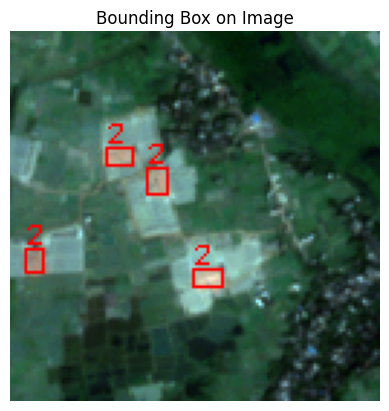

In [29]:
import os
import cv2
import matplotlib.pyplot as plt

# Set image and label paths
label_path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/crossval/dhaka_airshed_aa_labels_sentinel/1/train/labels/23.7491_90.2071.txt"
image_path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/crossval/dhaka_airshed_obb_labels_sentinel/1/train/images/23.7491_90.2071.png"



# Image size
IMG_WIDTH, IMG_HEIGHT = 128, 128

# Read image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read label file
with open(label_path, 'r') as f:
    lines = f.readlines()

# Draw bounding boxes
for line in lines:
    parts = list(map(float, line.strip().split()))
    class_id = int(parts[0])
    x_center, y_center, width, height = parts[1:]

    # De-normalize
    x_center *= IMG_WIDTH
    y_center *= IMG_HEIGHT
    width *= IMG_WIDTH
    height *= IMG_HEIGHT

    # Convert to top-left corner format
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # Draw rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=1)
    cv2.putText(image, str(class_id), (x1, y1 - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)

# Show image
plt.imshow(image)
plt.title("Bounding Box on Image")
plt.axis('off')
plt.show()


In [30]:
import os
import glob
import shutil

IMG_WIDTH, IMG_HEIGHT = 128, 128

def convert_obb_to_aabb(coords):
    xs = coords[::2]
    ys = coords[1::2]
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    
    x_center = (x_min + x_max) / 2.0
    y_center = (y_min + y_max) / 2.0
    width = x_max - x_min
    height = y_max - y_min

    return [x_center, y_center , width, height]

def convert_obb_folder_to_aabb(obb_dir, aa_dir):
    # Remove and recreate aa_label directory
    if os.path.exists(aa_dir):
        shutil.rmtree(aa_dir)
        print(f"Removed existing: {aa_dir}")
    os.makedirs(aa_dir, exist_ok=True)

    label_files = glob.glob(os.path.join(obb_dir, "*.txt"))
    for file_path in label_files:
        with open(file_path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            parts = list(map(float, line.strip().split()))
            class_id = int(parts[0])
            coords = parts[1:]
            if len(coords) != 8:
                print(f"Skipping malformed: {file_path}")
                continue

            aabb = convert_obb_to_aabb(coords)
            new_lines.append(f"{class_id} {' '.join(f'{x:.6f}' for x in aabb)}\n")

        out_path = os.path.join(aa_dir, os.path.basename(file_path))
        with open(out_path, 'w') as f:
            f.writelines(new_lines)

        print(f"Converted: {file_path} → {out_path}")

if __name__ == "__main__":
    base_path = "/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel"
    airshed_names = ["delhi_airshed", "dhaka_airshed", "lucknow_airshed", "wb_small_airshed"]

    for name in airshed_names:
        obb_folder = os.path.join(base_path, name, "obb_labels")
        aa_folder = os.path.join(base_path, name, "aa_labels")
        convert_obb_folder_to_aabb(obb_folder, aa_folder)


Removed existing: /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_airshed/aa_labels
Converted: /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_airshed/obb_labels/28.2442_77.3822.txt → /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_airshed/aa_labels/28.2442_77.3822.txt
Converted: /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_airshed/obb_labels/28.9442_77.4145.txt → /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_airshed/aa_labels/28.9442_77.4145.txt
Converted: /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_airshed/obb_labels/28.8354_76.8910.txt → /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_airshed/aa_labels/28.8354_76.8910.txt
Converted: /home/rishabh.mondal/Brick-Kilns